# Funções, bibliotecas e Dataframe ficticios

In [1]:
import pandas as pd
import numpy as np

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)
df = fake_database2(2250); df_bck = df.copy(); display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/fake_database.py


,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,...,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,0.760160,-0.615804,-1.265651,-0.893330,1.958468,-1.627466,-0.417301,1.094771,-0.109074,1.259486,...,sim,sim,sim,sim,não,B,A,C,A,A
1,4.184960,-1.410049,1.823178,-2.345877,-2.389559,0.398232,-0.215785,-1.672407,-1.605356,4.210558,...,sim,sim,não,não,não,C,A,B,C,A
2,0.612352,1.621521,1.523133,1.627239,-3.271473,2.896423,-0.330301,-1.046614,0.217903,0.493344,...,sim,não,sim,sim,sim,B,B,A,C,D
3,0.941721,1.964849,-0.193451,0.259487,-3.043287,1.889778,-0.680121,-1.304495,-0.116426,0.904183,...,não,sim,não,sim,sim,B,C,A,C,B
4,-1.162440,-1.240820,-3.094952,-5.451858,1.797717,-4.064634,-0.426677,-0.622408,0.061095,1.526137,...,sim,não,não,sim,não,C,A,C,C,B


https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py
TUDO OK


In [3]:
# Variavel Dependente
var_dep = 'y'
y = df[var_dep]
display(y.head())

x = df.drop('y', axis=1)

0    0
1    0
2    0
3    1
4    1
Name: y, dtype: object

In [4]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# Normalização (scaling entre 0 e 1) com MinMaxScaler ******************************
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)
# df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

# Padronização (média 0 e desvio padrão 1) com StandardScaler **********************
#from sklearn.preprocessing import StandardScaler
#padronizacao = StandardScaler()
#x = padronizacao.fit_transform(x)
# df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

2 niveis: x_bin0 => ['sim' 'não']
2 niveis: x_bin1 => ['sim' 'não']
2 niveis: x_bin2 => ['sim' 'não']
2 niveis: x_bin3 => ['sim' 'não']
2 niveis: x_bin4 => ['não' 'sim']
3 niveis: x_cat0 => ['B' 'C' 'A']
3 niveis: x_cat1 => ['A' 'B' 'C']
3 niveis: x_cat2 => ['C' 'B' 'A']
3 niveis: x_cat_0 => ['A' 'C' 'D' 'B']
3 niveis: x_cat_1 => ['A' 'D' 'B' 'C']
(1687, 32) (563, 32)
(1687,) (563,)


# ---------------------- Grid Search ----------------------

In [5]:
from sklearn.model_selection import GridSearchCV

grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Valores discretos para a taxa de aprendizado
    'n_estimators': [100, 300, 500, 700, 1000],    # Número de árvores
    'max_depth': [3, 5, 7, 9, 10],                 # Profundidade máxima das árvores
    'min_child_weight': [1, 3, 5, 7, 10],          # Peso mínimo da folha
    'gamma': [0, 1, 2, 3, 4, 5],                   # Gamma
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],        # Fração de amostras por árvore
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # Fração de colunas usadas por árvore
    'reg_alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],   # Regularização L1 (valores log-uniformes discretizados)
    'reg_lambda': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]   # Regularização L2 (valores log-uniformes discretizados)
}

# Espaço de busca usando range e np.linspace
grid = {
    'learning_rate': np.linspace(0.01, 0.3, 5),            # 5 valores igualmente espaçados entre 0.01 e 0.3
    'n_estimators': range(100, 1001, 200),                 # Valores de 100 a 1000, com incremento de 200
    'max_depth': range(3, 11, 2),                          # Valores de 3 a 10 com incremento de 2 (3, 5, 7, 9)
    'min_child_weight': range(1, 11, 2),                   # Valores de 1 a 10 com incremento de 2
    'gamma': np.linspace(0, 5, 6),                         # 6 valores entre 0 e 5 (0, 1, 2, 3, 4, 5)
    'subsample': np.linspace(0.6, 1.0, 5),                 # 5 valores igualmente espaçados entre 0.6 e 1.0
    'colsample_bytree': np.linspace(0.6, 1.0, 5),          # 5 valores entre 0.6 e 1.0
    'reg_alpha': np.logspace(-5, -1, 5),                   # 5 valores em escala log entre 1e-5 e 1e-1
    'reg_lambda': np.logspace(-5, -1, 5)                   # 5 valores em escala log entre 1e-5 e 1e-1
}

import xgboost as xgb
modelo_xgb = xgb.XGBClassifier()
random_search_cv = GridSearchCV(estimator=modelo_xgb, 
                                param_grid=params, 
                                cv=4, 
                                scoring='accuracy', 
                                verbose=1)
# Treinamento do Modelo
random_search_cv.fit(x_treino, y_treino)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 2, 4, 6, 10],
                         'n_estimators': [3, 5, 7, 10, 15, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [6]:
random_search_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 0,
 'n_estimators': 100}

,threshold,tn,fp,fn,tp,acuracia,precisao,sensibilidade,especificidade,f1,valor_pre_posi,valor_pre_neg,taxa_falsos_positivos,taxa_falsos_negativos,fdr,fo_r,indice_youden,coef_matthews,fb_score
0,0.0,0,280,0,283,0.503,0.503,1.000,0.000,0.669,0.503,0.000,1.000,0.000,0.497,0.000,0.000,0.000,0.669
1,0.1,251,29,3,280,0.943,0.906,0.989,0.896,0.946,0.906,0.988,0.104,0.011,0.094,0.012,0.886,0.890,0.946
2,0.2,261,19,5,278,0.957,0.936,0.982,0.932,0.959,0.936,0.981,0.068,0.018,0.064,0.019,0.914,0.916,0.959
3,0.3,264,16,9,274,0.956,0.945,0.968,0.943,0.956,0.945,0.967,0.057,0.032,0.055,0.033,0.911,0.911,0.956
4,0.4,268,12,13,270,0.956,0.957,0.954,0.957,0.956,0.957,0.954,0.043,0.046,0.043,0.046,0.911,0.911,0.956
5,0.5,272,8,14,269,0.961,0.971,0.951,0.971,0.961,0.971,0.951,0.029,0.049,0.029,0.049,0.922,0.922,0.961
6,0.6,273,7,17,266,0.957,0.974,0.940,0.975,0.957,0.974,0.941,0.025,0.060,0.026,0.059,0.915,0.915,0.957
7,0.7,276,4,21,262,0.956,0.985,0.926,0.986,0.954,0.985,0.929,0.014,0.074,0.015,0.071,0.912,0.913,0.954
8,0.8,277,3,23,260,0.954,0.989,0.919,0.989,0.952,0.989,0.923,0.011,0.081,0.011,0.077,0.908,0.910,0.952
9,0.9,279,1,29,254,0.947,0.996,0.898,0.996,0.944,0.996,0.906,0.004,0.102,0.004,0.094,0.894,0.898,0.944


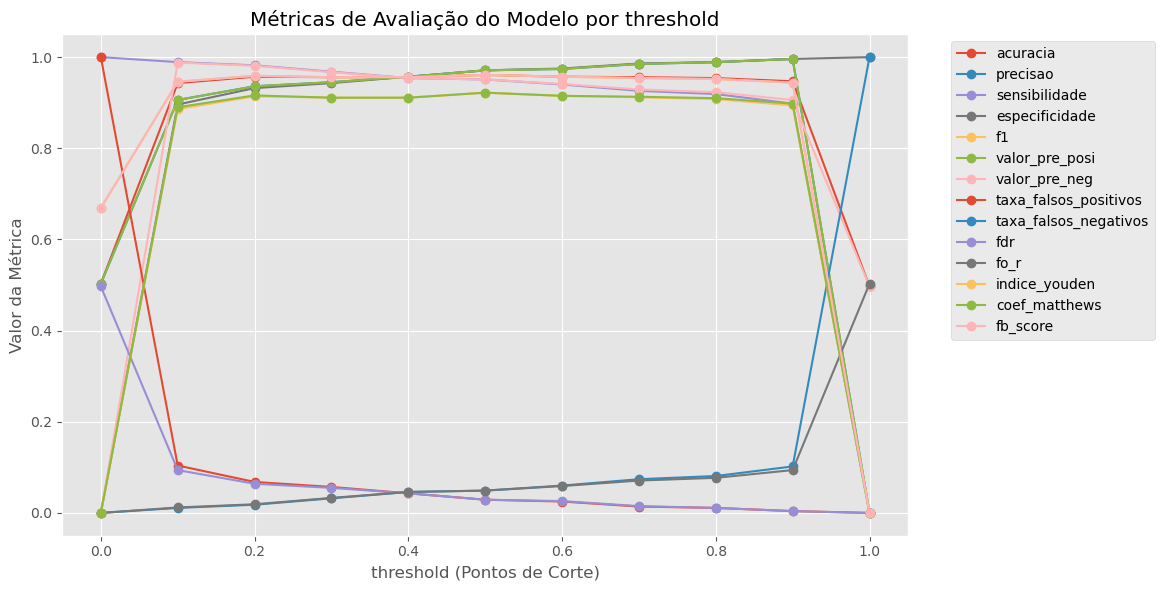

In [7]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = random_search_cv.predict(x_teste)
#avaliar_modelo(y_teste, previsoes, "Teste")

fd = aval_modelo_corte_tabela(x_teste, y_teste, random_search_cv)
display(fd)
aval_modelo_corte_grafico(fd)

# ---------------------- Bayes Search CV ----------------------

In [8]:
RANDOM_STATE = 3141592

In [9]:
# Validação interna e externa
from sklearn.model_selection import StratifiedKFold
# Validação internar
inner_cv = StratifiedKFold(shuffle=True, random_state=RANDOM_STATE)

# Validação externar
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [11]:
# DENFININDO ESPAÇO DE BUSCA
from skopt.space import Real, Integer, Categorical

# Definindo o espaço de busca
space = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),  # Taxa de aprendizado entre 0.01 e 0.3
    'n_estimators': Integer(100, 1000),                    # Número de árvores entre 100 e 1000
    'max_depth': Integer(3, 10),                           # Profundidade máxima entre 3 e 10
    'min_child_weight': Integer(1, 10),                    # Peso mínimo da folha entre 1 e 10
    'gamma': Real(0, 5, prior='uniform'),                  # Gamma entre 0 e 5
    'subsample': Real(0.6, 1.0, prior='uniform'),          # Fração de amostras para treinar cada árvore
    'colsample_bytree': Real(0.6, 1.0, prior='uniform'),   # Fração de colunas usadas por árvore
    'reg_alpha': Real(1e-5, 1e-1, prior='log-uniform'),    # Regularização L1
    'reg_lambda': Real(1e-5, 1e-1, prior='log-uniform')    # Regularização L2
}

###########################################
from skopt import BayesSearchCV

opt_dt = BayesSearchCV(
    estimator=modelo_xgb,
    search_spaces = space, 
    n_iter=500, # numero de interações
    scoring='recall', 
    n_jobs=-1, 
    cv=inner_cv, 
    random_state=RANDOM_STATE
    )

# Validação cruzada aninhada
from sklearn.model_selection import cross_val_score
bs_dt_nested_scores = cross_val_score(opt_dt, x_treino, y_treino, cv=outer_cv)
# essa variavel armazena apenas a validação

print(f'resultado de cada iteração do cv externo: {bs_dt_nested_scores}')
print(f'média: {bs_dt_nested_scores.mean()}')

opt_dt.fit(x_treino, y_treino)

KeyboardInterrupt: 

In [ ]:
opt_dt.best_params_

In [ ]:
#######################################################################################
# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = opt_dt.predict(x_teste)
#avaliar_modelo(y_teste, previsoes, "Teste")

fd = aval_modelo_corte_tabela(x_teste, y_teste, opt_dt)
display(fd)
aval_modelo_corte_grafico(fd)